<a href="https://colab.research.google.com/github/Kanaisabhi/Data_Analysis_Projects/blob/main/Google_Search_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install numpy pandas seaborn matplotlib pytrends

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pytrends.request import TrendReq #TrendReq for sending request to API

Importing trends data with python unofficial library pytrends

#Setup pytrend library and define keyword


In [ ]:
pytrends = TrendReq('en-US' , tz = 360)
keyword = "cloud computing"

#Data Request

In [ ]:
pytrends.build_payload([keyword] , timeframe='today 12-m' , cat = 0 , geo='' , gprop='') #gprop is getting only google data , category - ALL , geo - global

#Country wise intreset

In [ ]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by= keyword , ascending = False).head(15)

/tmp/ipython-input-1723530754.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




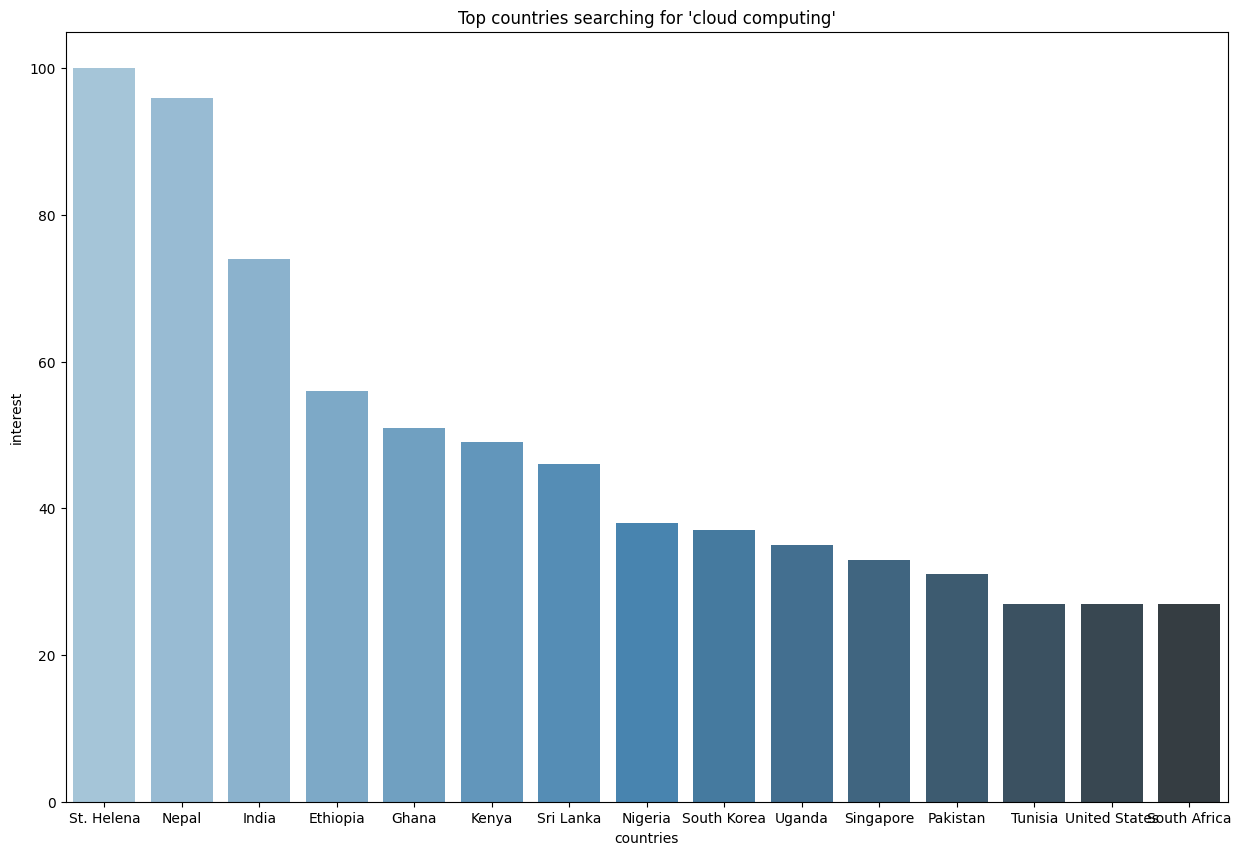

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x = region_data.index , y = region_data[keyword] , palette='Blues_d')
plt.title(f"Top countries searching for '{keyword}'")
plt.xlabel('countries')
plt.ylabel('interest')
plt.show()

#World map

In [ ]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data ,
                    locations = 'geoName' ,
                    locationmode='country names' ,
                    color = keyword ,
                    title=f"Search Interest for '{keyword}' for countries",
                    color_continuous_scale='Blues')
fig.show()

#Time wise intrest


In [ ]:
time_df = pytrends.interest_over_time()
time_df

/usr/local/lib/python3.12/dist-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,cloud computing,isPartial
date,,
2024-12-22,26,False
2024-12-29,28,False
2025-01-05,34,False
2025-01-12,29,False
2025-01-19,41,False
2025-01-26,32,False
2025-02-02,34,False
2025-02-09,34,False
2025-02-16,34,False


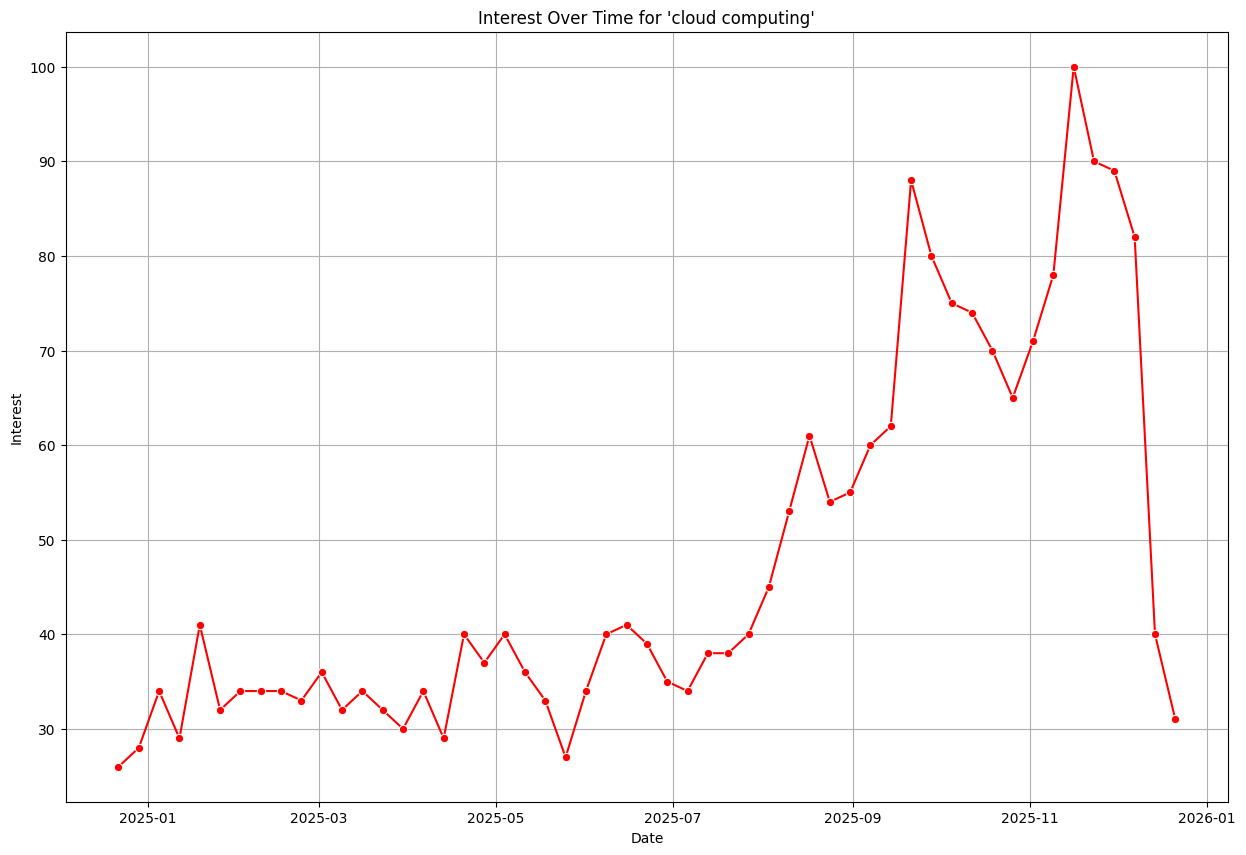

In [ ]:
plt.figure(figsize=(15,10))

sns.lineplot(
    x=time_df.index,
    y=time_df[keyword],
    marker='o',
    color='red'
)

plt.title(f"Interest Over Time for '{keyword}'")
plt.xlabel('Date')
plt.ylabel('Interest')
plt.grid(True)
plt.show()

#Multiple keyword comparison

In [ ]:
kw_list = ["cloud computing" , "artificial intelligence" , "machine learning", "data science"]
pytrends.build_payload(kw_list, cat = 0 , timeframe = 'today 12-m' , geo = '' , gprop = '')

/usr/local/lib/python3.12/dist-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



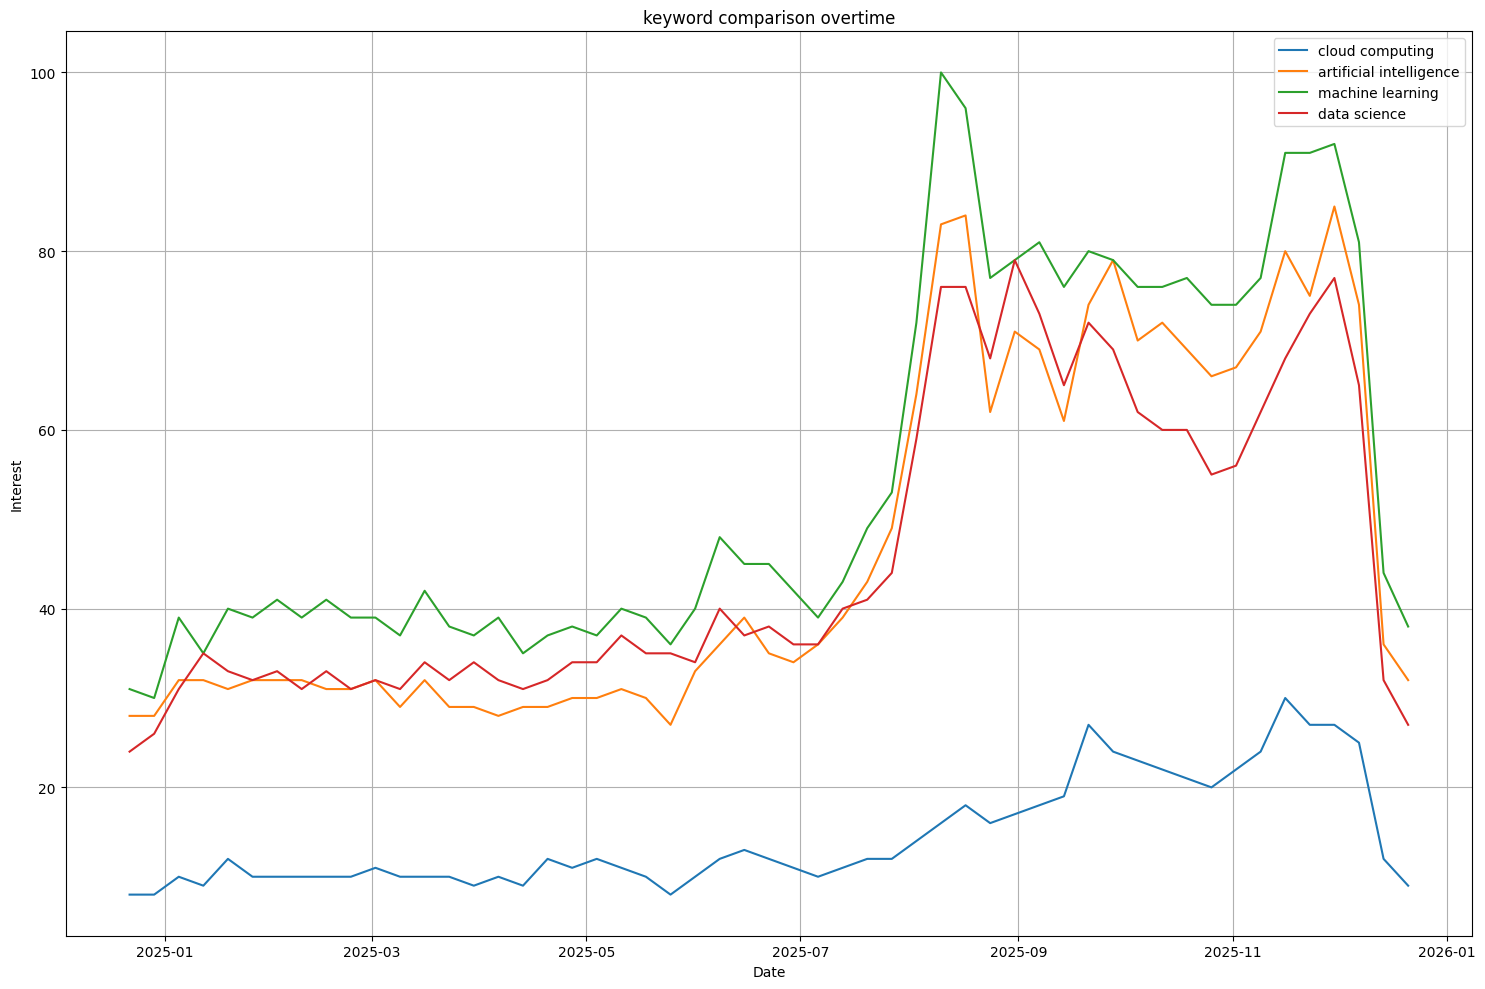

In [ ]:
compare_df = pytrends.interest_over_time()
plt.figure(figsize=(15,10))
for kw in kw_list:
  plt.plot(compare_df.index , compare_df[kw] , label = kw)

plt.title("keyword comparison overtime")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()